# Probability density function

 A probability density function (PDF), or density of a continuous random variable, is a function $f_X$ that describes the relative likelihood for the random variable $X$ to take on a given value. A r.v. $X$ has density $f(x)$ if

1. $f (x) \geq 0$, para toda $x \in \mathbb{R}$.
2. $\int_{-\infty}^{\infty} f(x) dx = 1$.
3. $P(a \leq X \leq b)=\int_{a}^{b} f(x) dx$.

The Comulative Distribution Function $F(x)$, of a continuous r.v.s. $X$ with
PDF $f(x)$, is
$$
F(x)=P(X \leq x) = \int_{-\infty}^{x} f(t) dt,\ 
-\infty < x < \infty 
$$

### Expected value and variance of continuous r.v.

Let $X$ be a r.v. with PDF $f(x)$. The expected value of
$X$ can be calculated as:

$$
\mu=E(X)=\int_{-\infty}^{\infty} x f(x) dx
$$

The variance of $X$ is given by:

$$
\sigma^2=E(X-\mu)^2]=\int_{-\infty}^{\infty} (x-\mu)^2 f(x) dx
= \int x^2 f(x)dx - \mu^2
$$

The square root of the variance, $\sigma$, is called the standard deviation of $X$.


## Uniform distribution


- Intuitively, a Uniform r.v. on the interval $(a, b)$ 
is a completely random number between $a$ and $b$. 
We formalize the notion of completely random on an interval by specifying that the PDF should be constant over the interval.

- A continuous r.v. $U$ is said to have the
\textit{Uniform distribution} on the interval $(a, b)$ if its PDF is
$$ f(x) =
  \begin{cases}
    \frac{1}{b-a}       & \quad \text{if } a < x < b, \\
    0  & \quad \text{otherwise.}\\
  \end{cases}
$$

We denote this by $U \sim Unif(a, b)$.

\item The CDF is the accumulated area under the PDF:
$$ F(x) =
  \begin{cases}
    0 & \quad \text{if } x \leq a, \\
    \frac{x-a}{b-a}       & \quad \text{if } a < x < b, \\
    1  & \quad \text{if } x \geq b.\\
  \end{cases}
$$

The Uniform distribution we will most frequently use is the
$Unif(0,1)$ distribution, also called the standard Uniform.

**Unif(0,1) PDF and CDF.**

![](https://i.imgur.com/nncfd7a.png)


- Expected value and variance:
$$
E(U)=\frac{a+b}{2},\quad Var(U)=\frac{(b-a)^2}{12}.
$$


### Universality of the Uniform  

Let $F$ be a CDF which is a continuous function and strictly increasing on the support of the distribution. 
This ensures that the inverse function $F^{-1}$ exists, as a function from (0, 1) to $\mathbb{R}$. We then have
the following results.

1. Let $U \sim Unif(0, 1)$ and $X = F^{-1}(U)$.
Then $X$ is an r.v. with CDF $F$.
2. Let $X$ be an r.v. with CDF $F$. Then $F(X) \sim Unif(0, 1)$.

### Example:

Let $F$ be a CDF which is a 
continuous function and strictly increasing on the support of the distribution. 
This ensures that the inverse function $F^{-1}$ exists, as a function 
from (0, 1) to $\mathbb{R}$. Then,

1. Let $U \sim Unif(0, 1)$ and $X = F^{-1}(U)$.
Then $X$ is an r.v. with CDF $F$.
2. Let $X$ be an r.v. with CDF $F$. Then $F(X) \sim Unif(0, 1)$.


### Prove numerically the Universality of the Uniform

- The first part of the theorem says that if we start with $U \sim Unif(0, 1)$ and a CDF $F$, 
then we can create an r.v. whose CDF is $F$ by plugging $U$ into the inverse CDF $F^{-1}$. 
Since  $F^{-1}$ is a function (known as the quantile function), $U$ is a random variable, and a
function of a random variable is a random variable, $F^{-1}(U)$ is a random variable;
universality of the Uniform says its CDF is $F$.
    

**1. Inverse transform sampling**

- Let $f(x) = \frac{x^3}{4}$ for $0 < x < 2$.
- Thus $F(x) = \frac{x^4}{16}$ and $F^{-1}(u) = 2 \times u^{1/4}$.

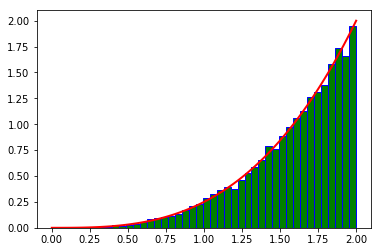

In [1]:
import numpy as np
import matplotlib.pyplot as plt

size = 10000
U = np.random.rand(size)  # Uniform distribution sampling
FI = 2*U**(1/4)  # Inverse transform sampling

# Let's plot the pdf
x = np.linspace(0, 2, 100)  # Range of X rvs
fx = x**3 / 4

plt.plot(x, fx, '-r', linewidth=2)  # pdf
plt.hist(FI, bins=40, normed=True, facecolor='green', edgecolor='blue')
plt.show()

**2.The second part of the theorem** goes in the reverse direction, starting from an r.v. $X$
whose CDF is $F$ and then creating a $Unif(0, 1)$ r.v. Again, $F$ is a function, $X$ is a
random variable, and a function of a random variable is a random variable, so $F (X)$
is a random variable. Since any CDF is between 0 and 1 everywhere, $F (X)$ must
take values between 0 and 1. 
Universality of the Uniform says that the distribution
of $F (X)$ is Uniform on (0, 1).

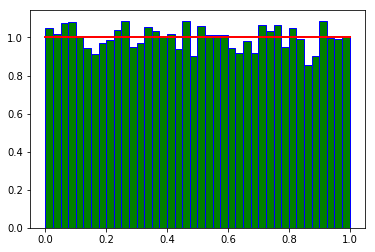

In [2]:
# We have generated a rvs from the inverse transform sampling

X = 2*U**(1/4)
FX = X**4 / 16  # CDF(X)

# Let's check the distribution of FX
plt.hist(FX, bins=40, normed=True, facecolor='green', edgecolor='blue')

# Plot the Unif(0,1) pdf
from scipy.stats import uniform
u = np.linspace(0, 1, 2)
fu = uniform.pdf(u)
plt.plot(u, fu, '-r', linewidth=2)  # Unif(0,1) pdf
plt.show()

**- Let's check graphically the inverse transform sampling below**

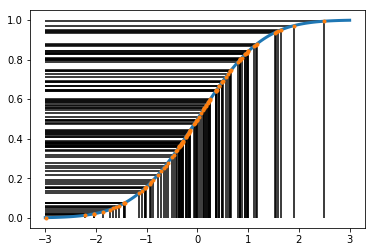

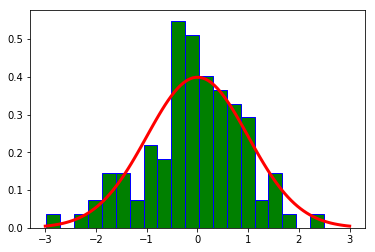

In [3]:
from scipy.stats import norm

U = np.random.rand(100)  # Unif(0,1)

X = norm.ppf(U)  # F^-1 for a distribution N(0,1)

xn = np.linspace(-3,3,100)  # Support to plot
pdfn = norm.pdf(xn)  # pdf of N(0,1)
cdfn = norm.cdf(xn)  # cdf of N(0,1)

plt.hlines(U, -3, X)  # horizontal lines U(0,1)
plt.vlines(X, 0, U)  # vertical lines sampling result in X

plt.plot(xn, cdfn, linewidth=3)  # plot cdf curve
plt.plot(X, U, '.')  # X result vs U sampling
plt.show()

# You already know what is in X
plt.hist(X, normed=True, bins=20, facecolor='green', edgecolor='blue')
plt.plot(xn, pdfn, '-r', linewidth=3)  # plot pdf curve

plt.show()

# Rejection method

Qué pasa si no es posible calcular la inversa
o no es trivial calcularla. Podemos usar el método de rechazo, 
que es muy similar al método hit and miss de Monte Carlo.

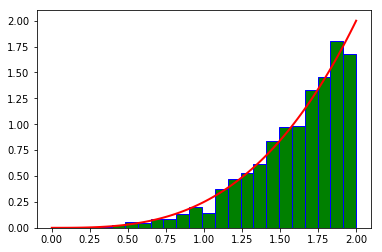

In [4]:
def f(x):
    return x**3/4  # evaluamos fx

n = 1000

(a, b, c) = (0, 2, 2)

# Let's plot the pdf
x = np.linspace(0, 2, 100)  # Range of X rvs
fx = f(x)

x_rvs = []

i = 0
while i < n:
    x_r = a + (b - a) * np.random.rand()
    y_r = c * np.random.rand()
    if y_r < f(x_r):  # punto dentro (aceptamos)
        x_rvs += [x_r]  # append element to list
        i += 1
        
plt.plot(x, fx, '-r', linewidth=2)
plt.hist(x_rvs, bins=20, normed=True, facecolor='green', edgecolor='blue')
plt.show()

## Exponential distribution

- The Exponential distribution is the continuous counterpart to the Geometric distribution. Recall that a Geometric random variable counts the number of failures before the first success in a sequence of Bernoulli trials. The story of the Exponential distribution is analogous, but we are now waiting for a success in continuous time, where successes arrive at a rate of $\lambda$ successes per unit of time. The average number of successes in a time interval of length $t$ is $\lambda t$, though the actual number of successes varies randomly. An Exponential random variable represents the waiting time until the first arrival of a success.

- Lets consider a poisson process with parameter $\lambda$. We are observing the process from time $t_0$.
    
    ![](https://i.imgur.com/yPEiytQ.png)
    
    - $X$: time elapsed beteween $t_0$ and the next arrival of the process
    - $\lambda$: rate parameter, arrivals per unit of time

- Thus, a continuous r.v. $X$ is said to have the \textbf{Exponential distribution} with parameter if its PDF is
$$
f(x)=\lambda e^{-\lambda x},\quad x>0.
$$
We denote this by $X \sim Expo(\lambda)$.

- The corresponding CDF is 
$$
F(x)=1-e^{-\lambda x}, \quad x > 0.
$$

- Expected value and variance
$$
E(X)=\frac{1}{\lambda} (=\beta),\quad Var(X)=\frac{1}{\lambda^2}(=\beta^2)
$$

### Memoryless property

- The Exponential distribution has a very special property called the **memoryless property**, which says that even if you’ve waited for hours or days without success, the success isn’t any more likely to arrive soon. In fact, you might as well have just started waiting 10 seconds ago.

    - Consider a poisson process that begins to be observed from an instant $t_0$. Then if there have not been arrivals for an elapsed time $t$, the random variable representing the time remaining until the next arrival has an exponential distribution with parameter $\lambda$.
    
    - Let $s$ represent the time remaining until the next arrival of the process:
    
    ![](https://i.imgur.com/GniJFk4.png)
    
    -Let us demonstrate that:
    $$
    P(X\leq t+s | X > t) = 1 - e^{\lambda s}
    $$
    
    $$
    P(X>t+s | X>t) = \frac{P(X>t+s \cap X>t)}{P(X>t)} 
    = \frac{P(X>t+s \cap X>t)}{1 - P(X \leq t)} 
    $$
    
    $$ = \frac{P(X>t+s)}{1-P(X \leq t)} 
     = \frac{1 - P(X \leq t+s)}{1-P(X \leq t)} 
    $$
    
    $$ = \frac{1 - [1 - e^{-\lambda(t+s)}]}{1 - [1 - e^{-\lambda t}]}
     = \frac{e^{-\lambda(t+s)}}{e^{-\lambda t }}
     = e^{-\lambda s}
    $$

### Applications:

1. The time until a radioactive particle decays, or the time between clicks of a geiger counter.
2. The time it takes before your next telephone call.
3. In queuing theory, the service times of agents in a system (e.g. how long it takes for a bank teller etc. to serve a customer) are often modeled as exponentially distributed variables. 
4. In hydrology, the exponential distribution is used to analyze extreme values of such variables as monthly and annual maximum values of daily rainfall and river discharge volumes

**- Exponential distribution inverse transform sampling**, see slides 4-6 https://drive.google.com/file/d/0B-dmEvN59Z2ZZFZ0bTdLMTV1bHc/view.

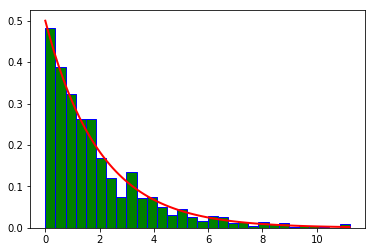

In [5]:
size = 1000
lam = 0.5

U = np.random.rand(size)
E = -1 / lam * np.log(U)

# Let's check the distribution of E
plt.hist(E, bins=30, normed=True, facecolor='green', edgecolor='blue')

# Let's plot a theoretical pdf
from scipy.stats import expon

x = np.linspace(0, np.max(E), 100)
fx = expon.pdf(x, scale=1/lam)  # expon(0.5) pdf
plt.plot(x, fx, '-r', linewidth=2)
plt.show()

## Normal distribution

The Normal distribution is a famous continuous distribution with a bell-shaped
PDF. It is extremely widely used in statistics because of a theorem, the central limit
theorem, which says that under very weak assumptions, the sum of a large number of
i.i.d. random variables has an approximately Normal distribution, regardless of the
distribution of the individual r.v.s. This means we can start with independent r.v.s
from almost any distribution, discrete or continuous, but once we add up a bunch of
them, the distribution of the resulting r.v. looks like a Normal distribution.


- A continuous r.v. is said to have the **Normal distribution** if its PDF is given by
$$
f(x|\mu,\sigma)=\frac{1}{\sigma \sqrt{2 \pi}}
e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$


- **Standard Normal distribution.**  A continuous r.v. $Z$ is said to have the standard Normal distribution if its PDF $\phi$ is given by
$$
\phi(z)=\frac{1}{\sqrt{2 \pi}}
e^{-\frac{-z^2}{2}},\quad -\infty < z < \infty
$$


- The standard Normal CDF $\Phi$ is the accumulated area under the PDF:
$$
\Phi(z)=\int_{-\infty}^z \phi(t)dt=\int_{-\infty}^z 
\frac{1}{\sqrt{2 \pi}}
e^{-\frac{-t^2}{2}} dt.
$$


- There are several important symmetry properties that can be deduced from the standard Normal PDF and CDF.

    1. Symmetry of PDF : $\phi$ satisfies $\phi(z) = \phi(-z)$, i.e., $\phi$ is an even function.
    2. Symmetry of tail areas: The area under the PDF curve to the left of -2,
    which is $P (Z \leq 2) = \Phi(-2)$ by definition, equals the area to the right of 2, which is $P (Z \geq 2) = 1-\Phi(2)$. In general, we have
    $$
    \Phi(z)=1-\Phi(-z)
    $$
    for all $z$.
    3. Symmetry of $Z$ and $-Z$: If $Z \sim N(0, 1)$, then $-Z \sim N(0, 1)$ as well.


- If $Z \sim N (0, 1)$, then
$$
X=\mu+\sigma Z
$$
is said to have the \textit{Normal distribution} with mean $\mu$ and variance $\sigma^2$. We denote this by $X \sim N (\mu,\sigma^2)$.


- Of course, if we can get from $Z$ to $X$, then we can get from $X$ back to $Z$. 
The process of getting a standard Normal from a non-standard Normal is called, appropriately enough, **standardization**. For $X \sim N (\mu,\sigma^2)$, the standardized version of $X$ is
$$
\frac{X-\mu}{\sigma}\sim N(0,1).
$$


- (68-95-99.7\% rule). If $X \sim N(\mu,\sigma^2)$, then
$$P(|X-\mu|<\sigma) \approx 0.6827 $$
$$P(|X-\mu|<2\sigma) \approx 0.9545 $$
$$P(|X-\mu|<3\sigma) \approx 0.9973 $$


- Reproduciremos la figura en: https://en.wikipedia.org/wiki/Normal_distribution

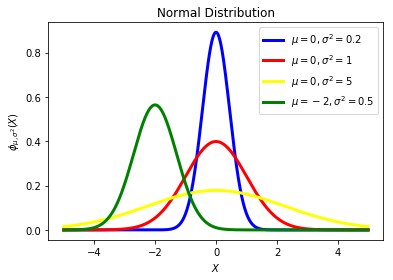

In [6]:
from scipy.stats import norm

# m: mu (mean)
# s: sigma (standard deviation)
m, s = 0, np.sqrt(0.2)

# Evaluamos la pdf en el rango -5, 5, con intervalo 0.01
x = np.arange(-5, 5, 0.01)
px = norm.pdf(x, m, s)

plt.plot(x, px, linestyle="-", color="blue", linewidth=3)

# Segunda curva
m, s = 0, 1

x = np.arange(-5, 5, 0.01)  # rango de la va
px = norm.pdf(x, m, s)  # pdf de la va

plt.plot(x, px, linestyle="-", color="red", linewidth=3)

# Tercera curva
m, s = 0, np.sqrt(5)

x = np.arange(-5, 5, 0.01)
px = norm.pdf(x, m, s)

plt.plot(x, px, linestyle="-", color="yellow", linewidth=3)

# Cuarta curva
m, s = -2, np.sqrt(0.5)

x = np.arange(-5, 5, 0.01)
px = norm.pdf(x, m, s)

plt.plot(x, px, linestyle="-", color="green", linewidth=3)
plt.title("Normal Distribution")
plt.legend([r"$\mu=0, \sigma^2=0.2$", r"$\mu=0, \sigma^2=1$", 
           r"$\mu=0, \sigma^2=5$", r"$\mu=-2, \sigma^2=0.5$"])
plt.xlabel(r"$X$")
plt.ylabel(r"$\phi_{\mu, \sigma^2}(X)$")
plt.show()

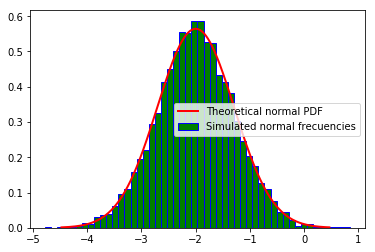

In [7]:
# Vamos a generar un vector aleatorio X ~ Norm(m, s)
# de tamaño rep
rep = 10000

m, s = -2, np.sqrt(0.5)

rvs = norm.rvs(loc=m, scale=s, size=rep) 

bines = 50  # bines para el histograma
# normed = True, es un histograma normalizado por el area
p=plt.hist(rvs, bins=bines, facecolor='green', edgecolor='blue', normed=True)

# Colocaremos una curva de densidad (gráfica wikipedia)
# sobre el histograma
x = np.arange(m-3.5*s, m+3.5*s, 0.01)
px = norm.pdf(x, m, s)
plt.plot(x, px, linestyle="-", color="red", linewidth=2)

lab = "normal"
plt.legend(["Theoretical " + lab + " PDF", "Simulated " + lab + " frecuencies"])
plt.show()

**Homework 2:** Choose 3 common __[continuous distribution](https://drive.google.com/file/d/0B-dmEvN59Z2Za25CWV81bld4Zms/view)__ and replicate Homework 1. 
    - E.g.: Beta, Gamma, Weibull distributions.